In [29]:
from sklearn import svm,metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.unicode_minus'] = False

In [30]:
#[ 도미 ]
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0,
33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0,
610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
#[ 빙어 ]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

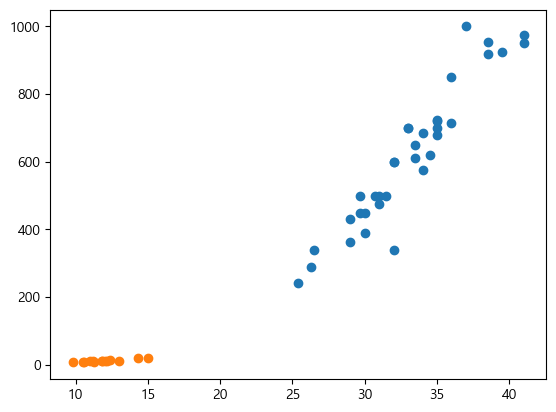

In [31]:
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)


In [32]:
# 도미는 1, 빙어는 0
length = bream_length+smelt_length
weight = bream_weight+smelt_weight
result = [1]*35+[0]*14


In [33]:
# 데이터프레임으로 변환
data = [length,weight,result]
df = pd.DataFrame(data)
df = df.T # 행, 열 자리바꿈
df

,0,1,2
0,25.4,242.0,1.0
1,26.3,290.0,1.0
2,26.5,340.0,1.0
3,29.0,363.0,1.0
4,29.0,430.0,1.0
5,29.7,450.0,1.0
6,29.7,500.0,1.0
7,30.0,390.0,1.0
8,30.0,450.0,1.0
9,30.7,500.0,1.0


In [34]:
datas = df.iloc[:,0:2] # :모든줄의 0,1 가져오기
datas

result = df.iloc[:,2] # 결과값, 도미인지 빙어인지 
result

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
30    1.0
31    1.0
32    1.0
33    1.0
34    1.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
40    0.0
41    0.0
42    0.0
43    0.0
44    0.0
45    0.0
46    0.0
47    0.0
48    0.0
Name: 2, dtype: float64

In [35]:
# 자동 분류 랜덤셔플
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = train_test_split(
    datas, result,stratify=result)
# random_state=42, 훈련세트, 테스트 세트가 고정
# stratify: 설정데이터를 가지고 랜덤으로 데이터를 섞어준다
train_input

,0,1
2,26.5,340.0
48,15.0,19.9
5,29.7,450.0
31,38.5,955.0
19,33.5,650.0
29,37.0,1000.0
39,11.2,9.8
14,32.0,600.0
43,12.0,9.8
33,41.0,975.0


In [36]:
# 2. 데이터 학습시키기
clf = KNeighborsClassifier()
clf.fit(train_input,train_target)

# 3. 데이터 예측하기, test_target과 맞는지 확인(윗줄)
predict = clf.predict(test_input)
predict

array([1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1.])

In [37]:
# 4. 정확도 측정
score = clf.score(test_input,test_target)
print("정답률: ",score)

정답률:  1.0


In [38]:
# 25,150의 데이터는 knn판별할 때 이웃하는 데이터는 indexs
distance, indexs = clf.kneighbors([[25,150]])
indexs

array([[ 1, 29, 25, 21, 10]], dtype=int64)

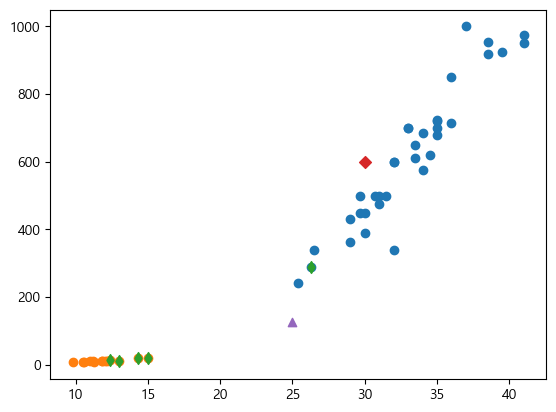

In [39]:
# 25,125의 고기
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)
plt.scatter(train_input.iloc[indexs[0],0],train_input.iloc[indexs[0],1],marker='d')
plt.scatter(30,600,marker='D')
plt.scatter(25,125,marker='^')
# plt.xticks([0,1000])

In [40]:
# 표준점수: 훈련데이터 - 평균 / 표준편차

mean = np.mean(train_input,axis=0)
mean # 길이와 무게의 평균

std = np.std(train_input,axis=0)
std # 표준편차

0     10.136133
1    327.824094
dtype: float64

In [41]:
train_scaled = (train_input - mean)/std

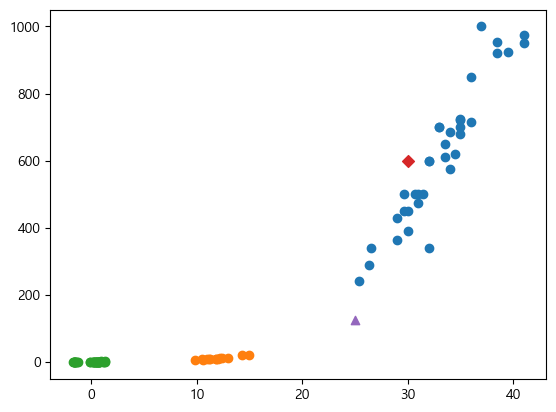

In [45]:
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)
plt.scatter(train_scaled.iloc[:,0],train_scaled.iloc[:,1])
plt.scatter(30,600,marker='D')
plt.scatter(25,125,marker='^')

In [46]:
clf.fit(train_scaled,train_target)

KNeighborsClassifier()

In [47]:
test_scaled = (test_input-mean)/std
score = clf.score(test_scaled,test_target)
print(score)

1.0
